# Data Preprocessing & Visualization

In [19]:
# Import labraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Current working directory

os.getcwd()

'c:\\Users\\Admin\\Documents\\Apziva_Projects'

In [21]:
# Loading the dataset

df = pd.read_csv("term-deposit-marketing-2020.csv")

In [22]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [23]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [25]:
import pandas as pd

def value_counts_all_columns(df, dropna=True, normalize=False, sort=True, ascending=False):
    """
    Generate value counts for each column in a DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze
    dropna : bool, default True
        Whether to exclude NaN values from counts
    normalize : bool, default False
        If True, return relative frequencies instead of counts
    sort : bool, default True
        Whether to sort the results by count/frequency
    ascending : bool, default False
        Sort order (False for descending, True for ascending)
    
    Returns:
    --------
    dict
        Dictionary with column names as keys and value_counts Series as values
    """
    result = {}
    
    for column in df.columns:
        result[column] = df[column].value_counts(
            dropna=dropna, 
            normalize=normalize, 
            sort=sort, 
            ascending=ascending
        )
    
    return result



In [26]:
value_counts_all_columns(df)

{'age': age
 32    1909
 31    1826
 33    1770
 34    1730
 35    1721
       ... 
 90       1
 94       1
 86       1
 95       1
 81       1
 Name: count, Length: 70, dtype: int64,
 'job': job
 blue-collar      9383
 management       8166
 technician       6852
 admin            4483
 services         3910
 retired          1437
 self-employed    1414
 entrepreneur     1405
 unemployed       1104
 housemaid        1087
 student           524
 unknown           235
 Name: count, dtype: int64,
 'marital': marital
 married     24386
 single      10889
 divorced     4725
 Name: count, dtype: int64,
 'education': education
 secondary    20993
 tertiary     11206
 primary       6270
 unknown       1531
 Name: count, dtype: int64,
 'default': default
 no     39191
 yes      809
 Name: count, dtype: int64,
 'balance': balance
 0        3209
 1         179
 2         141
 4         126
 3         124
          ... 
 2694        1
 27624       1
 2587        1
 12322       1
 2444        1
 N

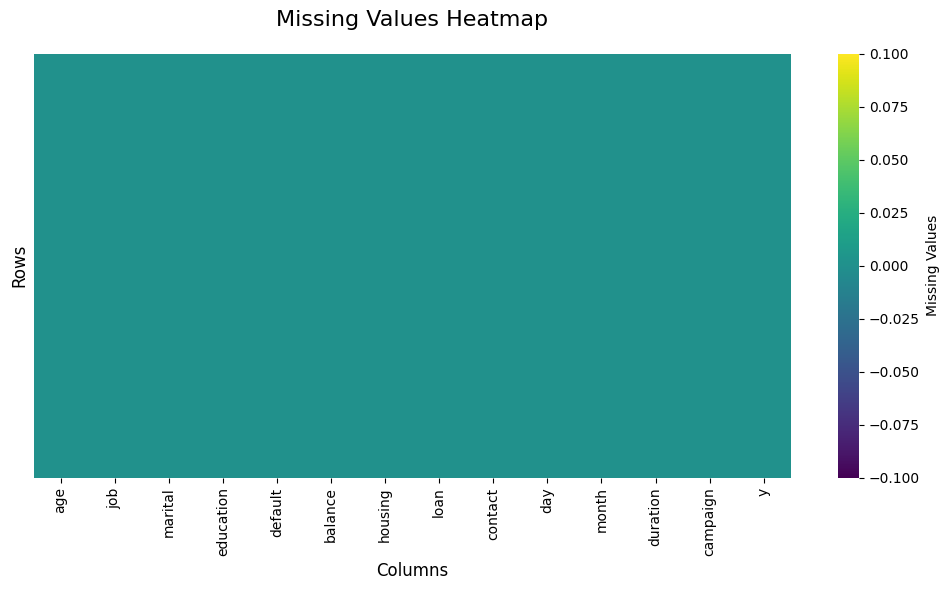

Missing Values Summary:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


In [27]:
# Checking  NaN values


# Create heatmap of NaN values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), 
            cbar=True,
            yticklabels=False,  # Hide row labels for cleaner look
            cmap='viridis',     # Color scheme
            cbar_kws={'label': 'Missing Values'})

plt.title('Missing Values Heatmap', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Missing Values Summary:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")




The dataset doesn't contain any missing or empty value

In [29]:
# Separate independant variables and the targert variable

X = df.drop('y', axis = 1)
y = df["y"]

In [30]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1


In [31]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
39995     no
39996    yes
39997    yes
39998     no
39999     no
Name: y, Length: 40000, dtype: object

In [32]:
y.value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

The classes in the dataset are unbalanced. This ensures that the model may be biased toward a majority class and can't generalize well across all categories. To solve this, we're goint to use SMOTE method.

In [33]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Modeling

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

def train_xgb_with_smote_separate(X_train, y_train, X_test, y_test):
    """
    Train an XGBoost model with preprocessing (applying SMOTE separately), then evaluate with F1 score.
    
    Steps:
    1. Encode y_train and y_test with LabelEncoder
    2. Identify column types:
       - int/float columns → StandardScaler
       - binary object columns with 'yes'/'no' → LabelEncoder
       - other object columns → OneHotEncoder
    3. Apply preprocessing
    4. Apply SMOTE only on training data (separately from pipeline)
    5. Train XGBoostClassifier
    6. Evaluate model using F1 score on the test set
    
    Parameters:
    -----------
    X_train : pd.DataFrame
        Training feature set
    y_train : pd.Series
        Training labels (not encoded)
    X_test : pd.DataFrame
        Test feature set
    y_test : pd.Series
        Test labels (not encoded)
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'preprocessor': fitted preprocessing pipeline
        - 'model': trained XGBoost model
        - 'label_encoder': LabelEncoder for target
        - 'binary_encoders': dictionary of LabelEncoders for binary features
        - 'f1_score': F1 score on test set
    """

    # Encode target labels
    le_y = LabelEncoder()
    y_train_enc = le_y.fit_transform(y_train)
    y_test_enc = le_y.transform(y_test)

    # Identify numeric and object columns
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()

    # Identify binary 'yes'/'no' columns among object columns
    binary_cols = [col for col in obj_cols 
                   if set(X_train[col].dropna().unique()) <= {'yes', 'no'}]

    # Identify other categorical columns
    cat_cols = list(set(obj_cols) - set(binary_cols))

    # Encode binary yes/no columns in train and test with LabelEncoder
    le_dict = {}
    for col in binary_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        le_dict[col] = le  # store encoders if needed later

    # Define preprocessing for numeric and categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
            ('bin', 'passthrough', binary_cols)  # already label encoded
        ]
    )

    # Create preprocessing pipeline
    preprocessing_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # Preprocess the data
    X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocessing_pipeline.transform(X_test)

    # Apply SMOTE only to training data
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train_enc)

    # Train classifier
    clf = XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    )
    clf.fit(X_train_res, y_train_res)

    # Predict on test set
    y_pred_enc = clf.predict(X_test_preprocessed)

    # Compute F1 score on encoded labels
    f1 = f1_score(y_test_enc, y_pred_enc)

    print(f"F1 Score on Test Set: {f1:.4f}")

    return {
        'preprocessor': preprocessing_pipeline,
        'model': clf,
        'label_encoder': le_y,
        'binary_encoders': le_dict,
        'f1_score': f1
    }

# Usage:
results = train_xgb_with_smote_separate(X_train, y_train, X_test, y_test)


F1 Score on Test Set: 0.5507


# Models Optimisation

# XGBoost Optimisation

In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def train_xgb_with_gridsearch(X_train, y_train, X_test, y_test):
    """
    Train an XGBoost model with preprocessing (applying SMOTE separately), 
    optimize hyperparameters with GridSearchCV, 
    and display feature importance.

    Steps:
    1. Encode y_train and y_test with LabelEncoder
    2. Identify column types:
       - int/float columns → StandardScaler
       - binary object columns with 'yes'/'no' → LabelEncoder
       - other object columns → OneHotEncoder
    3. Apply preprocessing separately (not inside GridSearchCV)
    4. Apply SMOTE only on training data
    5. Use GridSearchCV to find the best XGBoost hyperparameters
    6. Train the model with the best parameters
    7. Evaluate with F1 score
    8. Display feature importance

    Parameters:
    -----------
    X_train : pd.DataFrame
        Training feature set
    y_train : pd.Series
        Training labels (not encoded)
    X_test : pd.DataFrame
        Test feature set
    y_test : pd.Series
        Test labels (not encoded)

    Returns:
    --------
    dict : Dictionary containing:
        - 'preprocessor': fitted preprocessing pipeline
        - 'best_model': trained XGBoost model with best params
        - 'label_encoder': LabelEncoder for target
        - 'binary_encoders': dictionary of LabelEncoders for binary features
        - 'best_params': best hyperparameters from GridSearchCV
        - 'f1_score': F1 score on test set
    """

    # -------------------------------
    # 1. Encode target labels
    # -------------------------------
    le_y = LabelEncoder()
    y_train_enc = le_y.fit_transform(y_train)
    y_test_enc = le_y.transform(y_test)

    # -------------------------------
    # 2. Identify feature types
    # -------------------------------
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()

    binary_cols = [col for col in obj_cols 
                   if set(X_train[col].dropna().unique()) <= {'yes', 'no'}]
    cat_cols = list(set(obj_cols) - set(binary_cols))

    # -------------------------------
    # 3. Encode binary yes/no columns
    # -------------------------------
    le_dict = {}
    for col in binary_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        le_dict[col] = le

    # -------------------------------
    # 4. Create preprocessing pipeline
    # -------------------------------
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
            ('bin', 'passthrough', binary_cols)
        ]
    )

    preprocessing_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # Transform data
    X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocessing_pipeline.transform(X_test)

    # -------------------------------
    # 5. Apply SMOTE on training data
    # -------------------------------
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train_enc)

    # -------------------------------
    # 6. Define XGBoost and hyperparameter grid
    # -------------------------------
    clf = XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    )

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    scorer = make_scorer(f1_score)

    grid_search = GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        scoring=scorer,
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    # -------------------------------
    # 7. Fit GridSearchCV
    # -------------------------------
    grid_search.fit(X_train_res, y_train_res)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # -------------------------------
    # 8. Evaluate model
    # -------------------------------
    y_pred_enc = best_model.predict(X_test_preprocessed)
    f1 = f1_score(y_test_enc, y_pred_enc)

    print(f"Best Parameters: {best_params}")
    print(f"F1 Score on Test Set: {f1:.4f}")

    # -------------------------------
    # 9. Feature importance plot
    # -------------------------------
    feature_names = (
        list(num_cols) +
        list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)) +
        list(binary_cols)
    )

    importances = best_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.gca().invert_yaxis()
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.show()

    return {
        'preprocessor': preprocessing_pipeline,
        'best_model': best_model,
        'label_encoder': le_y,
        'binary_encoders': le_dict,
        'best_params': best_params,
        'f1_score': f1
    }


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
F1 Score on Test Set: 0.5794


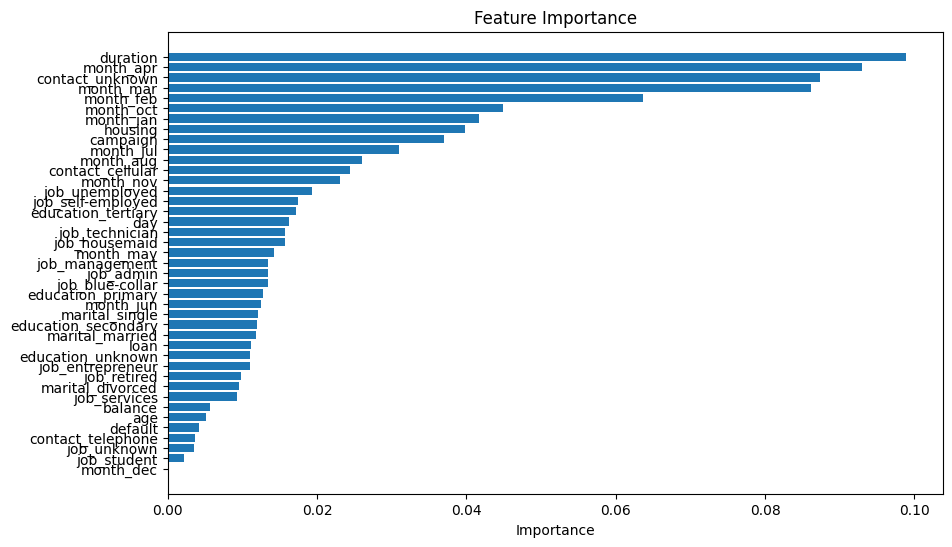

In [49]:
results = train_xgb_with_gridsearch(X_train, y_train, X_test, y_test)

The varaible that clients should focus on are: duration, month(apr, mar, feb, oct, jan), housing and compaign.

# Determine the segment(s) of customers client should prioritize.

# DBSCAN Clustering Method

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from scipy.stats import mode

def customer_segmentation_dbscan(df, y_col=None, eps=0.5, min_samples=5):
    """
    Cluster customers with DBSCAN and summarize min/mean/max for numeric
    and most frequent for categorical features.
    """
    df = df.copy()

    # Separate target variable
    y = None
    y_encoder = None
    if y_col:
        le_y = LabelEncoder()
        y = le_y.fit_transform(df[y_col])
        y_encoder = le_y
        df = df.drop(columns=[y_col])

    # Identify feature types
    num_features = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Split categorical features into binary_yesno and others
    binary_features = []
    multi_cat_features = []
    for col in cat_features:
        unique_vals = df[col].dropna().unique()
        if set(map(str.lower, unique_vals)) <= {"yes", "no"}:
            binary_features.append(col)
        else:
            multi_cat_features.append(col)

    # Pipelines for preprocessing
    transformers = []

    if num_features:
        transformers.append(("num", StandardScaler(), num_features))

    if binary_features:
        # Binary yes/no → LabelEncoder
        for col in binary_features:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

        transformers.append(("binary", "passthrough", binary_features))

    if multi_cat_features:
        transformers.append(("multi_cat", OneHotEncoder(handle_unknown="ignore"), multi_cat_features))

    preprocessor = ColumnTransformer(transformers=transformers)

    # Build pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("clusterer", DBSCAN(eps=eps, min_samples=min_samples))
    ])

    # Fit DBSCAN
    cluster_labels = pipeline.fit_predict(df)

    df_clustered = df.copy()
    df_clustered["cluster"] = cluster_labels

    # Summary statistics as DataFrame
    summary_data = []
    
    for cluster_id, group in df_clustered.groupby("cluster"):
        row = {"cluster": cluster_id, "count": len(group)}
        
        # Y variable: mean with respect to class 1 (if y exists)
        if y is not None:
            cluster_indices = group.index
            y_cluster = y[cluster_indices]
            row["y_mean_class1"] = np.mean(y_cluster)
        
        # Numeric features: min, mean, max
        for col in num_features:
            row[f"{col}_min"] = group[col].min()
            row[f"{col}_mean"] = group[col].mean()
            row[f"{col}_max"] = group[col].max()
        
        # Categorical features: most frequent
        for col in binary_features + multi_cat_features:
            mode_series = group[col].mode()
            if not mode_series.empty:
                most_freq = mode_series.iloc[0]
            else:
                most_freq = group[col].iloc[0] if len(group[col]) > 0 else None
            row[f"{col}_most_frequent"] = most_freq
        
        summary_data.append(row)
    
    summary_df = pd.DataFrame(summary_data)

    return {
        "clusters": cluster_labels,
        "summary": summary_df,
        "pipeline": pipeline,
        "y_encoded": y,
        "y_encoder": y_encoder
    }

In [ ]:
response = customer_segmentation_dbscan(df, y_col='y')
response["summary"]  

In [69]:
response["summary"]  

,cluster,count,y_mean_class1,age_min,age_mean,age_max,balance_min,balance_mean,balance_max,day_min,...,campaign_mean,campaign_max,default_most_frequent,housing_most_frequent,loan_most_frequent,job_most_frequent,marital_most_frequent,education_most_frequent,contact_most_frequent,month_most_frequent
0,-1,33767,0.083898,19,41.205052,95,-8019,1430.046347,102127,1,...,3.068321,63,0,1,0,blue-collar,married,secondary,cellular,may
1,0,40,0.000000,29,39.800000,51,-120,275.725000,1510,5,...,1.575000,4,0,1,0,management,married,tertiary,unknown,may
2,1,58,0.000000,22,30.948276,42,-235,389.103448,1704,5,...,1.517241,3,0,1,0,admin,single,secondary,unknown,may
3,2,47,0.000000,24,34.638298,42,-315,271.042553,1263,5,...,1.765957,4,0,1,0,services,married,secondary,unknown,may
4,3,438,0.002283,24,37.726027,59,-972,428.728311,3514,5,...,1.783105,5,0,1,0,blue-collar,married,secondary,unknown,may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,338,4,0.000000,33,35.000000,37,-173,29.250000,355,18,...,3.250000,4,0,1,0,blue-collar,married,secondary,cellular,may
340,339,11,0.181818,25,31.181818,36,0,545.000000,1379,22,...,1.363636,2,0,0,0,management,single,tertiary,cellular,may
341,340,7,0.000000,32,34.000000,36,0,530.571429,1778,22,...,1.000000,1,0,0,0,management,married,tertiary,cellular,may
342,341,6,0.500000,25,26.000000,27,0,361.000000,715,22,...,1.500000,2,0,0,0,student,single,secondary,cellular,may


In [71]:
summary_sorted = response["summary"].sort_values('y_mean_class1', ascending=False)
summary_sorted

,cluster,count,y_mean_class1,age_min,age_mean,age_max,balance_min,balance_mean,balance_max,day_min,...,campaign_mean,campaign_max,default_most_frequent,housing_most_frequent,loan_most_frequent,job_most_frequent,marital_most_frequent,education_most_frequent,contact_most_frequent,month_most_frequent
325,324,6,0.666667,31,32.833333,36,178,585.000000,953,12,...,1.000000,1,0,1,0,blue-collar,single,secondary,cellular,may
308,307,5,0.600000,26,28.800000,31,-110,183.000000,524,5,...,1.200000,2,0,1,0,blue-collar,single,secondary,cellular,may
342,341,6,0.500000,25,26.000000,27,0,361.000000,715,22,...,1.500000,2,0,0,0,student,single,secondary,cellular,may
343,342,5,0.400000,27,28.800000,30,6,460.400000,707,25,...,1.000000,1,0,0,0,technician,single,secondary,cellular,may
285,284,5,0.400000,29,33.000000,35,0,303.800000,703,14,...,1.000000,1,0,1,0,management,married,tertiary,cellular,apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,24,3,0.000000,59,59.333333,60,10,108.333333,179,5,...,2.666667,3,0,1,0,blue-collar,married,primary,unknown,may
24,23,7,0.000000,28,31.714286,34,0,278.571429,804,6,...,1.714286,2,0,1,1,services,married,secondary,unknown,may
5,4,53,0.000000,31,40.792453,48,0,433.169811,1937,5,...,1.773585,4,0,1,0,technician,married,secondary,unknown,may
326,325,4,0.000000,52,52.500000,54,143,612.000000,1117,12,...,1.500000,2,0,1,0,blue-collar,married,secondary,cellular,may


We should focus on the segments with the highest mean class 1 values, as these represent the groups most likely to respond positively to the term deposit offer.